# POLI 175 - Lecture 12

## Classification II

## Announcement

- Problem Set due on 02/08 (Today)!

- Problem Set 02 is on!

- I hope python is treating you well! If not, we have plenty of office hours.

# Classification

## Class Example

- In 1988, the Chilean Dictator Augusto Pinochet conducted a referendum to whether he should step out.

- The FLACSO in Chile conducted a surver on 2700 respondents.

- We are going to build a model to predict their voting intentions.

## Data

| **Variable** | **Meaning** |
|:---:|---|
| region | A factor with levels:<br>- `C`, Central; <br>- `M`, Metropolitan Santiago area; <br>- `N`, North; <br>- `S`, South; <br>- `SA`, city of Santiago. |
| population | The population size of respondent's community. |
| sex | A factor with levels: <br>- `F`, female; <br>- `M`, male. |
| age | The respondent's age in years. |
| education | A factor with levels: <br>- `P`, Primary; <br>- `S`, Secondary; <br>- `PS`, Post-secondary. |
| income | The respondent's monthly income, in Pesos. |
| statusquo | A scale of support for the status-quo. |
| vote | A factor with levels: <br>- `A`, will abstain; <br>- `N`, will vote no (against Pinochet);<br>- `U`, is undecided; <br>- `Y`, will vote yes (for Pinochet). |

In [17]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading scikit learn relevant packages (note our new friends here!)
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
## Loading the data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile.head()
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541


## Logistic Regression

- With Scikit Learn, you need to create dummy variables for the categorical vars. Thus, you should do:

In [3]:
## Detour: Creating Dummies for Male
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean, dummies], axis=1)
chile_clean_wdumvars.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0


## Logistic Regression

**Your turn:** Create dummies for `region` and `education`. Which category was dropped in each of the processes?

In [4]:
## Your code here

## Creating dummies

In [5]:
## Dummies

# Sex
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean, dummies], axis=1)

# Education
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean_wdumvars, dummies], axis=1)

# Region
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean_wdumvars, dummies], axis=1)

## Head
chile_clean_wdumvars.head()

# You can even drop the original variables, if you want to: 
# DataFrame.drop(labels = ['v1, 'v2',..., 'vn'], axis = 1)

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


## Logistic Regression

- Now with Scikit Learn, and using all the categorical variables:

In [6]:
# Target variable
y = chile_clean_wdumvars['vote']

# Predictors
X = chile_clean_wdumvars[['logincome', 'logpop', 'age', 
                          'sex_M', 
                          'region_M', 'region_N', 'region_S', 'region_SA', 
                          'education_PS', 'education_S']]

# Loading the model
logreg =  LogisticRegression(solver = 'newton-cg') 

# Fitting the model
logreg.fit(X, y)

LogisticRegression(solver='newton-cg')

In [7]:
# Getting parameters
print('Original coefficients: ')
print(logreg.intercept_, logreg.coef_)

print('\n\n')

# Exps:
print('Exponentiated coefficients: ')
print(np.exp(logreg.intercept_), np.exp(logreg.coef_))

Original coefficients: 
[0.86307463] [[ 0.26476284 -0.322841    0.01517345 -0.60709657  0.70687911  0.57056382
   0.46210142  0.28097537 -0.99151494 -0.55811258]]



Exponentiated coefficients: 
[2.37043771] [[1.3031219  0.72408898 1.01528916 0.54493074 2.02765328 1.76926432
  1.58740629 1.32442098 0.3710142  0.57228819]]


# Generative Models of Classification

## Generative Models of Classification

- Logistic regression involves modeling the probability of a response given a set of parameters
    + Uses the logistic link for the *conditional distribution*
    
$$ \mathbb{E}(Y = 1 | X = x) \ = \ \mathbb{P}(Y = 1 | X = x) \ = \ \text{Logit}(\beta_0 + \cdots + \beta_pX_p) $$

- Another approach is to model the distribution for each values of $Y$.

- And then, use the Bayes' Theorem to get the conditional distributions.



- But why?
    1. Separation
    2. Small sample size

## Generative Models of Classification

- Let $\pi_k$ the prior probability of $Y = k$.

- And let $f_k(x) = \mathbb{P}(X = x | Y = k)$ the density function for an observation that comes from the $k$-th class.

The Bayes theorem says that:

$$ \mathbb{P}(Y = 1 | X = x) \ = \ \dfrac{\pi_kf_k(x)}{\sum_l \pi_l f_l(x)} $$

- Now, estimating $\pi_k$ is easy: we just compute the fraction that belongs to the $k$-th class.


- How about $f$?

    + The different estimators are going to give us different classifiers!

## Generative Models of Classification

### 1. Linear Discriminant Analysis

- Suppose we have only one variable $x$ and $f_k$ is Gaussian:

$$ x \sim N(\mu_k, \sigma_k^2) $$

- And assuming further that the draws have the same variance: $\sigma^2 = \sigma_k^2 \forall k$

- Computing the log of the posterior gives us:

$$ \delta_k(x) \ = \ x \dfrac{\mu_k}{\sigma^2} - \dfrac{\mu_k^2}{2\sigma^2} + \log(\pi_k) $$

## Generative Models of Classification

### 1. Linear Discriminant Analysis

And the decision for which class the $x$ belongs is simple: **Whichever has the highest probability is the "winner"**.

1. Let $x$

2. Compute $\delta_0(x)$

3. Compute $\delta_1(x)$

4. The highest is the winner :-)

## Generative Models of Classification

### 1. Linear Discriminant Analysis

But how the decision boundary looks like? We need to find the *indifference point*:

$$ \delta_1(x) = \delta_0(x) $$

Do the algebra, and you are going to find:

$$ x \ = \ \dfrac{\mu_0 + \mu_1}{2} $$



## Generative Models of Classification

### 1. Linear Discriminant Analysis

![img lda](../img/ldabounds.png)

## Generative Models of Classification

### 1. Linear Discriminant Analysis

And the LDA approximate the quantities of interest by doing the following:

1. $$ \widehat{\mu}_k  \ = \ \dfrac{1}{n_k} \sum_{i:y_i = k}x_i $$


2. $$ \widehat{\sigma}^2 \ = \ \dfrac{1}{n - K} \sum_{k=1}^K\sum_{i:y_i = k}(x_i - \widehat{\mu}_k)^2 $$


3. $$ \widehat{\pi}_k \ = \ \dfrac{n_k}{n} $$

Note that you can classify more than two categories.

## Generative Models of Classification

### 1. Linear Discriminant Analysis

The chance that $x$ belongs to $y=k$ is going to be:

$$ \widehat{\delta}_k(x) \ = \ x \dfrac{\widehat{\mu}_k}{\widehat{\sigma}^2} - \dfrac{\widehat{\mu}_k^2}{2\widehat{\sigma}^2} + \log(\widehat{\pi}_k) $$

Note that this is a linear function, so the name `Linear Discriminant Analysis`!

## Generative Models of Classification

### 1. Linear Discriminant Analysis

Now let's fit it using `scikit learn`

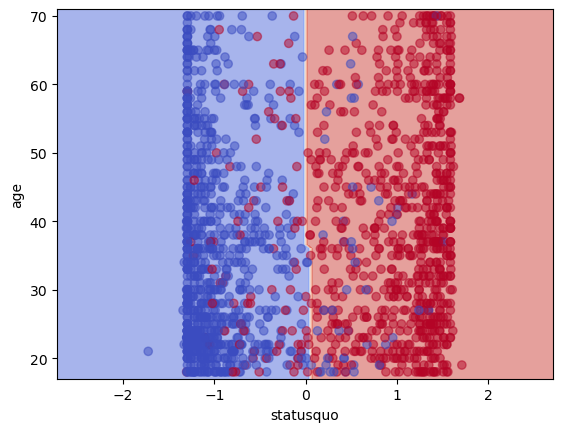

In [8]:
# Start a LDA (do not mix this up with Latent Dirichlet Allocation!)
X, y = chile_clean[['statusquo', 'age']], chile_clean['vote']

# Create the model
ldan = LinearDiscriminantAnalysis()

# Fitting model
ldan.fit(X, y)


# Plotting the tree boundaries
fig = DecisionBoundaryDisplay.from_estimator(ldan, X, response_method="predict",
                                             alpha=0.5, cmap=plt.cm.coolwarm)

# Plotting the data points    
fig.ax_.scatter(x = chile_clean['statusquo'], y = chile_clean['age'], 
                c = y, alpha = 0.5,
                cmap = plt.cm.coolwarm)

plt.show()

## Generative Models of Classification

### 1. Linear Discriminant Analysis

The most fundamental question:

- How much error in classification we are doing?

- To learn that, we need to study the `confusion matrix`!

### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

1. **Accuracy:** $$\dfrac{\text{correct predictions}}{\text{total observations}} \ = \ \dfrac{tp + tn}{tp + tn + fp + fn}$$

- High accuracy: lots of correct predictions!

### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

2. **Precision:** $$\dfrac{\text{true positives}}{\text{total predicted positive}} \ = \ \dfrac{tp}{tp + fp}$$

- High precision: low false-positive rates.


### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

3. **Recall:** $$\dfrac{\text{true positives}}{\text{total actual positive}} \ = \ \dfrac{tp}{tp + fn}$$

- High recall: low false-negative rates.


### Measuring Performance

4. **F1-Score**:

$$ \text{F1} \ = \ 2 \times \dfrac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

- Lets look at the two models: logistic x lda:

In [9]:
# Target variable
y = chile_clean_wdumvars['vote']

# Predictors
X = chile_clean_wdumvars[['logincome', 'logpop', 'age', 
                          'sex_M', 
                          'region_M', 'region_N', 'region_S', 'region_SA', 
                          'education_PS', 'education_S']]

# Loading the model
logreg =  LogisticRegression(solver = 'newton-cg')
ldan = LinearDiscriminantAnalysis()

# Fitting the models
logreg.fit(X, y)
ldan.fit(X, y)

LinearDiscriminantAnalysis()

### Measuring Performance

- Lets look at the two models: logistic x lda:

In [11]:
# Predictions
y_pred_logreg = logreg.predict(X)
y_pred_ldan = ldan.predict(X)

# Logistic Regression
print(confusion_matrix(y, y_pred_logreg))

# Linear Discriminant Analysis
print(confusion_matrix(y, y_pred_ldan))

[[578 289]
 [329 507]]
[[575 292]
 [333 503]]


In [13]:
# Logistic Classification Report
print(classification_report(y, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       867
           1       0.64      0.61      0.62       836

    accuracy                           0.64      1703
   macro avg       0.64      0.64      0.64      1703
weighted avg       0.64      0.64      0.64      1703



In [14]:
# Logistic Classification Report
print(classification_report(y, y_pred_ldan))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       867
           1       0.63      0.60      0.62       836

    accuracy                           0.63      1703
   macro avg       0.63      0.63      0.63      1703
weighted avg       0.63      0.63      0.63      1703



## Generative Models of Classification

### 2. Quadratic Discriminant Analysis

The main difference is that it assumes that every observation has its own covariance matrix:

- Drop the `same-sigma-assumption`.

### 3. Naïve Bayes

Instead of assuming that $f$ belongs to a class of distributions (e.g., Normal), it assumes that the $f$s are independent:

- Drop the `Multivariate-Normal-assumption`.

- For $p$ predictors, you make only assumptions about each $x_{ik}$:

$$ f_k(x) \ = \ f_{k1}(x_1)\times \cdots \times f_{kp}(x_p) $$

- And you assume a normal distribution (Gaussian shape) for each variable...

## Generative Models of Classification


![img](../img/ldaxqdaxnb.png)

- Purple: Naïve Bayes; Black: LDA; Green: QDA.

In [19]:
## QDA
qdan = QuadraticDiscriminantAnalysis()
qdan.fit(X, y)

## Gaussian Naive Bayes
nbays = GaussianNB()
nbays.fit(X, y)


# Predictions
y_pred_logreg = logreg.predict(X)
y_pred_ldan = ldan.predict(X)
y_pred_qdab = qdan.predict(X)
y_pred_nbays = nbays.predict(X)

In [20]:
# Logistic Regression
print(classification_report(y, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       867
           1       0.64      0.61      0.62       836

    accuracy                           0.64      1703
   macro avg       0.64      0.64      0.64      1703
weighted avg       0.64      0.64      0.64      1703



In [21]:
# Linear Discriminant Analysis
print(classification_report(y, y_pred_ldan))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       867
           1       0.63      0.60      0.62       836

    accuracy                           0.63      1703
   macro avg       0.63      0.63      0.63      1703
weighted avg       0.63      0.63      0.63      1703



In [22]:
# Quadratic Discriminant Analysis
print(classification_report(y, y_pred_qdab))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68       867
           1       0.68      0.49      0.57       836

    accuracy                           0.63      1703
   macro avg       0.64      0.63      0.63      1703
weighted avg       0.64      0.63      0.63      1703



In [23]:
# Gaussian Naive Bayes
print(classification_report(y, y_pred_nbays))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       867
           1       0.63      0.51      0.57       836

    accuracy                           0.61      1703
   macro avg       0.62      0.61      0.61      1703
weighted avg       0.62      0.61      0.61      1703



# Questions?

# See you next class
